In [1]:
# coding: utf-8 
import sys, os 
import numpy as np 
import matplotlib.pyplot as plt 
from mnist import load_mnist 
from two_layer_net import TwoLayerNet


In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [3]:
iters_num = 10000  # 반복 횟수를 적절히 설정한다. 
train_size = x_train.shape[0] 
batch_size = 100   # 미니배치 크기 
learning_rate = 0.1
train_loss_list = [] 
train_acc_list = [] 
test_acc_list = []


In [4]:
iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num): 
    batch_mask = np.random.choice(train_size, batch_size) # 미니배치 획득 
    x_batch = x_train[batch_mask] 
    t_batch = t_train[batch_mask]
    grad = network.gradient(x_batch, t_batch) # 기울기 계산
    for key in ('W1', 'b1', 'W2', 'b2'):   # 매개변수 갱신 
        network.params[key] -= learning_rate * grad[key]  
        
    loss = network.loss(x_batch, t_batch) # 학습 경과 기록 
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:    # 1에폭당 정확도 계산 
        train_acc = network.accuracy(x_train, t_train) 
        test_acc = network.accuracy(x_test, t_test) 
        train_acc_list.append(train_acc) 
        test_acc_list.append(test_acc) 
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.7890333333333334, 0.7938
train acc, test acc | 0.8776833333333334, 0.8811
train acc, test acc | 0.8984666666666666, 0.9033
train acc, test acc | 0.9069333333333334, 0.9114
train acc, test acc | 0.9153666666666667, 0.9158
train acc, test acc | 0.9192833333333333, 0.9209
train acc, test acc | 0.9242666666666667, 0.9262
train acc, test acc | 0.92775, 0.929
train acc, test acc | 0.9313, 0.9321
train acc, test acc | 0.93425, 0.9354
train acc, test acc | 0.9377833333333333, 0.9377
train acc, test acc | 0.94005, 0.9389
train acc, test acc | 0.9423333333333334, 0.9412
train acc, test acc | 0.9446333333333333, 0.9436
train acc, test acc | 0.94635, 0.9448
train acc, test acc | 0.9483833333333334, 0.9459


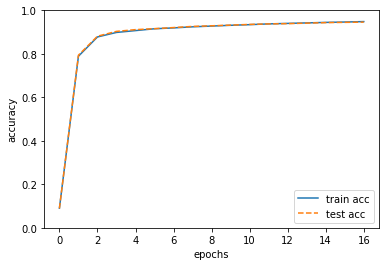

In [6]:
markers = {'train': 'o', 'test': 's'} 
x = np.arange(len(train_acc_list)) 
plt.plot(x, train_acc_list, label='train acc') 
plt.plot(x, test_acc_list, label='test acc', linestyle='--') 
plt.xlabel("epochs") 
plt.ylabel("accuracy") 
plt.ylim(0, 1.0) 
plt.legend(loc='lower right') 
plt.show()